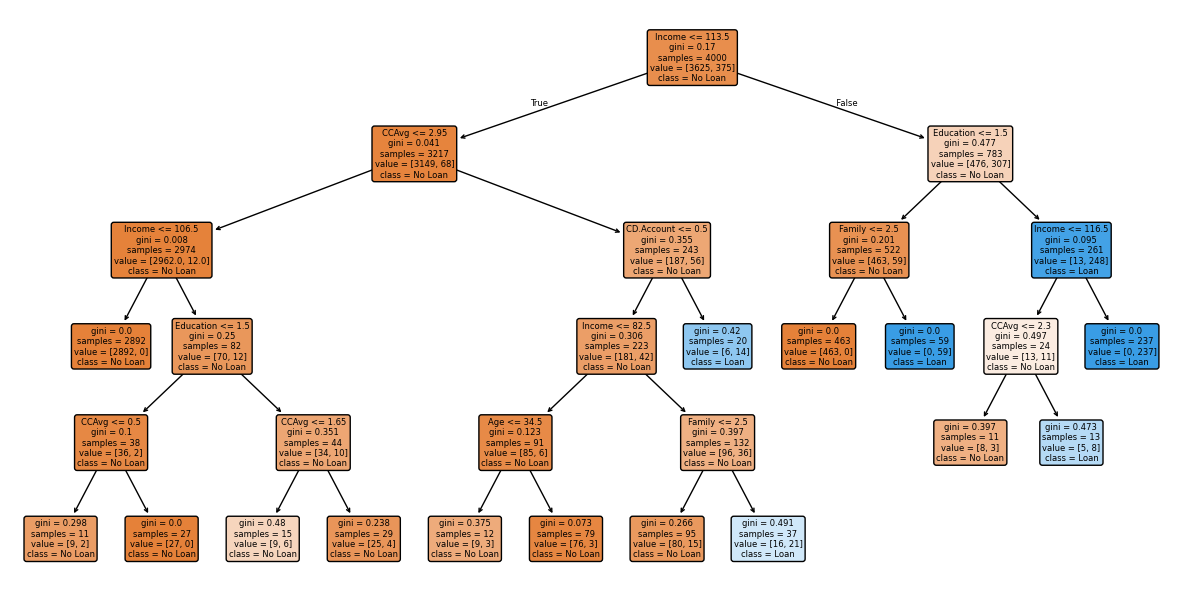

Accuracy: 0.986
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 score: 0.9333333333333333


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Define features and target variable
bankloan = pd.read_csv('bankloan.csv')
X = bankloan.drop('Personal.Loan', axis=1)
y = bankloan['Personal.Loan']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 15),
    'min_samples_leaf': np.arange(1, 15),
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

grid_search.fit(X_train, y_train)
grid_search.best_params_

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Visualise the decision tree
plt.figure(figsize=(15,7.5))
plot_tree(best_grid, filled=True, rounded=True,
          feature_names=X.columns.to_list(),
          class_names=['No Loan','Loan'])
plt.show()

# Predict the response for the test dataset
y_pred = best_grid.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))